In [39]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras import optimizers
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [40]:
np.random.seed(1671)  # for reproducibility
# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits

n_hidden1 = 500
n_hidden2 = 300
n_hidden3 = 100
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [41]:
# data: shuffled and split between train and test sets
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
input_size = 784
x_train = x_train.reshape(60000, input_size)
x_test = x_test.reshape(10000, input_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#print(y_train)

# normalize
x_train /= 255
x_test /= 255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#print(y_train)

(60000, 'train samples')
(10000, 'test samples')


In [42]:
model = Sequential()
model.add(Dense(n_hidden1, input_shape=(input_size,)))
model.add(Activation('selu'))
model.add(Dense(n_hidden2))
model.add(Activation('selu'))
model.add(Dense(n_hidden3))
model.add(Activation('selu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

OPTIMIZER = optimizers.SGD(lr=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_21 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_22 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
activation_23 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
__________

In [43]:
train_selu=history.history['acc']
val_selu=history.history['val_acc']

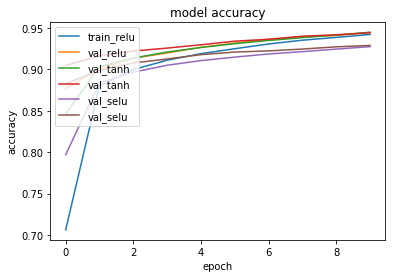

In [44]:
plt.plot(train_relu)
plt.plot(val_relu)

plt.plot(train_selu)
plt.plot(val_selu)

plt.plot(train_tanh)
plt.plot(val_tanh)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_relu', 'val_relu',
            'val_tanh','val_tanh','val_selu','val_selu'], loc='upper left')
plt.show()

In [46]:
model.save('models/mnist_ann.h5')